In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

#from tensorflow.keras.optimizers import Adam


workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Dataset//EDC11K_Znorm"


In [2]:
dataset = np.load(workdir + "//191204_EDC11K_z_norm_minmax.npz")
ss0 = np.load(workdir + '//191204_EDC11K_z_norm_minmax_r0_9_1.npz')

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 21


In [6]:
x.shape

(11360, 21313)

In [7]:
training_image_array.shape

(10224, 21313)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 21313) (10224,) (1136, 21313) (1136,)


In [11]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [12]:
inds = np.where(np.isnan(test_X))

In [13]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313)
10224 train samples
1136 test samples


In [15]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-10 13:07:54.037086


C:\Users\ylab\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


EndTime : 2019-12-10 13:46:25.116466


In [16]:
import matplotlib
from matplotlib import pyplot as plt

In [17]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [18]:
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EDC-11K//SVR"
c.to_csv(workdir + '//191205_EDC_11K_znorm_minmax_SVR_result.csv')

In [19]:
import pickle
from sklearn.externals import joblib
joblib.dump(svr_lin, workdir + '//191205_EDC_11K_znorm_minmax_SVR_model.pkl') 


['D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EDC-11K//SVR//191205_EDC_11K_znorm_minmax_SVR_model.pkl']

In [20]:
c

,Predicted,Test
0,1.978294,1.393330
1,1.979430,2.079442
2,1.847555,0.308173
3,1.962615,2.079442
4,1.980512,2.079442
5,1.973474,1.270682
6,1.981721,2.079442
7,1.973906,1.674144
8,1.979172,2.079442
9,1.965583,2.079442


In [21]:
clf_from_joblib = joblib.load(workdir + '//191205_EDC_11K_znorm_minmax_SVR_model.pkl') 
clf_from_joblib.predict(test_X)

array([1.97829369, 1.97942971, 1.84755549, ..., 1.95227255, 1.90856128,
       1.97952975])

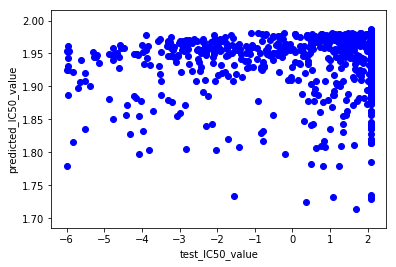

In [22]:
plt.scatter(test_label_array,y_lin,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191205_EDC_11K_znorm_minmax_SVR_scatter_plot.png')

In [23]:
rse = ((test_label_array-y_lin)**2).sum()
mse = np.mean((test_label_array-y_lin)**2)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.2997409557796358


In [24]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.005543897881546789, intercept=1.946564136312827, rvalue=0.26169187506223307, pvalue=3.040641884906643e-19, stderr=0.0006071750716933636)